<a href="https://colab.research.google.com/github/tygerlord/le-probleme-sat/blob/main/testq9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[le problème sat](https://blog.pasithee.fr/2013/02/25/le-probleme-sat/)

In [1]:
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 6.1 MB 12.7 MB/s 
     |████████████████████████████████| 17.9 MB 122 kB/s 
     |████████████████████████████████| 236 kB 78.3 MB/s 
     |████████████████████████████████| 207 kB 66.9 MB/s 
     |████████████████████████████████| 2.1 MB 52.0 MB/s 
     |████████████████████████████████| 634 kB 72.1 MB/s 
     |████████████████████████████████| 1.4 MB 59.6 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 943 kB 47.3 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 38.2 MB 20 kB/s 
     |████████████████████████████████| 3.5 MB 53.3 MB/s 
     |████████████████████████████████| 6.3 MB 33.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.31.0-py3-none-any.whl size=11728 sha256=0a0c28a03a2c2e06337c67943c67d1aba283728ef952be8cb5f31aa3a3a53531
  Stored in directory: /root/.cache/pip/wheels/29/dd/b2/1fe1a9ac92aaf75b267d893ae27329ea229f292a2930

In [2]:
%matplotlib inline
import qiskit as q

import matplotlib.pyplot as plt

import numpy as np

import math
import operator


# Test circuit

# Préparation

sat-pb.png

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# (x+y+z).(!x+!y).(!x+y+z)


# Construction du circuit

In [4]:
def test1():
    circuit = q.QuantumCircuit(10, 4)

    circuit.barrier()
    circuit.h([0,1,2])

    circuit.barrier()
    circuit.x([3,4,5])
    circuit.cx(0,3)
    circuit.cx(1,4)
    circuit.cx(2,5)

    circuit.barrier()
    circuit.cx([0,1,2], 6)

    circuit.barrier()
    circuit.cx([0+3,1+3], 7)

    circuit.barrier()
    circuit.cx([0+3,1,2], 8)


    circuit.barrier()
    circuit.mct([6,7,8], 9)


    circuit.barrier()
    m = range(0,3)
    circuit.measure(m,m)
    circuit.measure(9,3)
    return circuit
    
def test2():
    circuit = q.QuantumCircuit(10, 4)

    circuit.barrier()
    circuit.h([0,1,2])

    circuit.barrier()
    circuit.x([3,4,5])
    circuit.cx([0,1,2], [3,4,5])

    circuit.barrier()
    circuit.mct([0,1,2], 6)
 
    circuit.barrier()
    circuit.mct([3,4], 7)
 
    circuit.barrier()
    circuit.mct([3,1,2], 8)
 
    circuit.barrier()
    circuit.mct([6,7,8], 9)

    circuit.barrier()
    m = range(0,3)
    circuit.measure(m,m)
    circuit.measure(9,3)
    return circuit

def test3():
    circuit = q.QuantumCircuit(10, 4)

    circuit.barrier()
    circuit.h([0,1,2])

    circuit.barrier()
    circuit.x([3,4,5])
    circuit.cx([0,1,2], [3,4,5])

    circuit.barrier()
    circuit.mct([3,4,5],6)
 
    circuit.barrier()
    circuit.mct([0,1],7)
 
    circuit.barrier()
    circuit.mct([0,4,5],8)

    circuit.barrier()
    circuit.x([6,7,8])

    circuit.barrier()
    circuit.mct([6,7,8],9)

    circuit.barrier()
    m = range(0,3)
    circuit.measure(m,m)
    circuit.measure(9,3)
    return circuit

circuit = test3()

#  Affichage du circuit

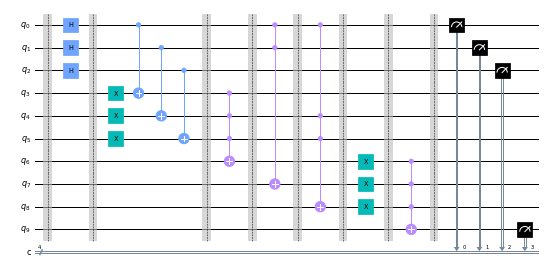

In [5]:
#print(circuit.draw(output='text'))
style = { "figwidth" : 50 }
circuit.draw(output='mpl', scale=0.5)#style=style)

# Exécution, Résultats et visualisation

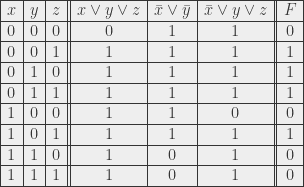

Nombre de '0'et de '1': {'1101': 121, '1010': 101, '0000': 119, '0111': 133, '0011': 128, '1110': 138, '1100': 127, '0001': 133}
{'1110': 138, '0111': 133, '0001': 133, '0011': 128, '1100': 127, '1101': 121, '0000': 119, '1010': 101}


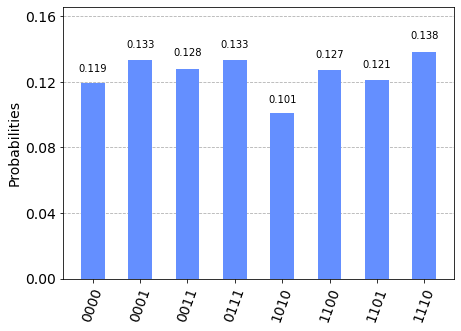

In [6]:
repeat = 1000

simulator = q.Aer.get_backend('qasm_simulator')

simulator.set_options(method="matrix_product_state")

job = q.execute(circuit, simulator, shots=repeat)

result = job.result()

counts = result.get_counts(circuit)
print("Nombre de '0'et de '1':",counts)

sorted_counts = dict( sorted(counts.items(), key=operator.itemgetter(1), reverse=True))
print(sorted_counts)

q.visualization.plot_histogram(counts)


In [7]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
